# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import FloodNetDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 17991


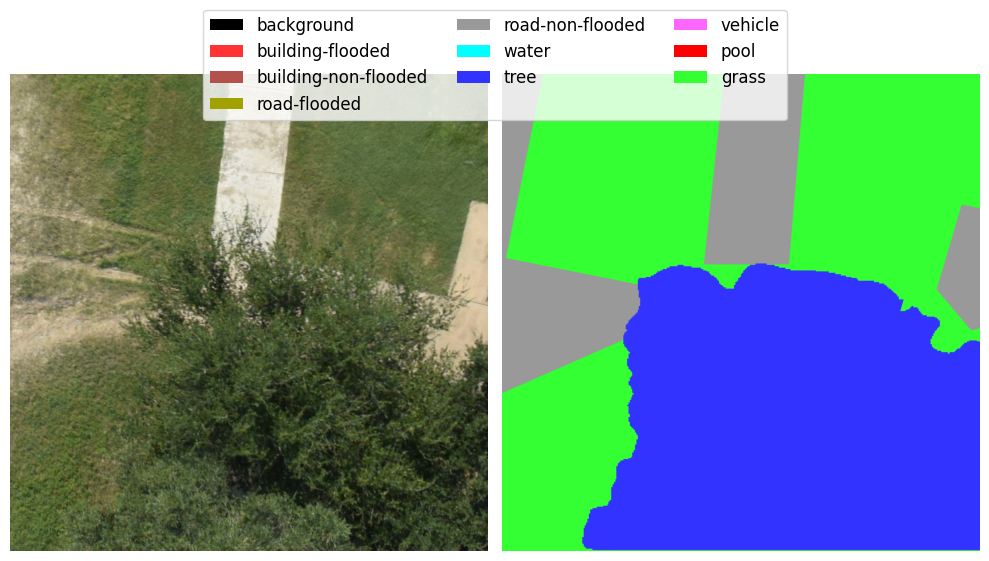

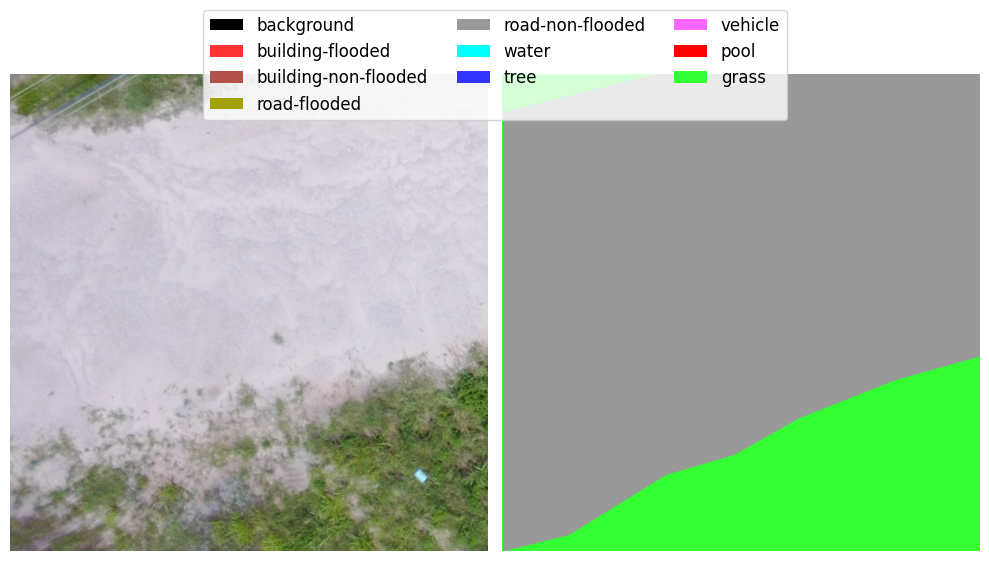

In [3]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/FloodNet/train"
}
dataset = FloodNetDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(15);
dataset.show_image(150);

In [3]:
dataset.data_distribution_table()

,Number of pixels
background,3.321043e+08
building-flooded,3.492028e+08
building-non-flooded,6.056650e+08
road-flooded,6.201256e+08
road-non-flooded,1.021283e+09
water,2.131175e+09
tree,3.298388e+09
vehicle,3.475164e+07
pool,3.938391e+07
grass,1.043285e+10


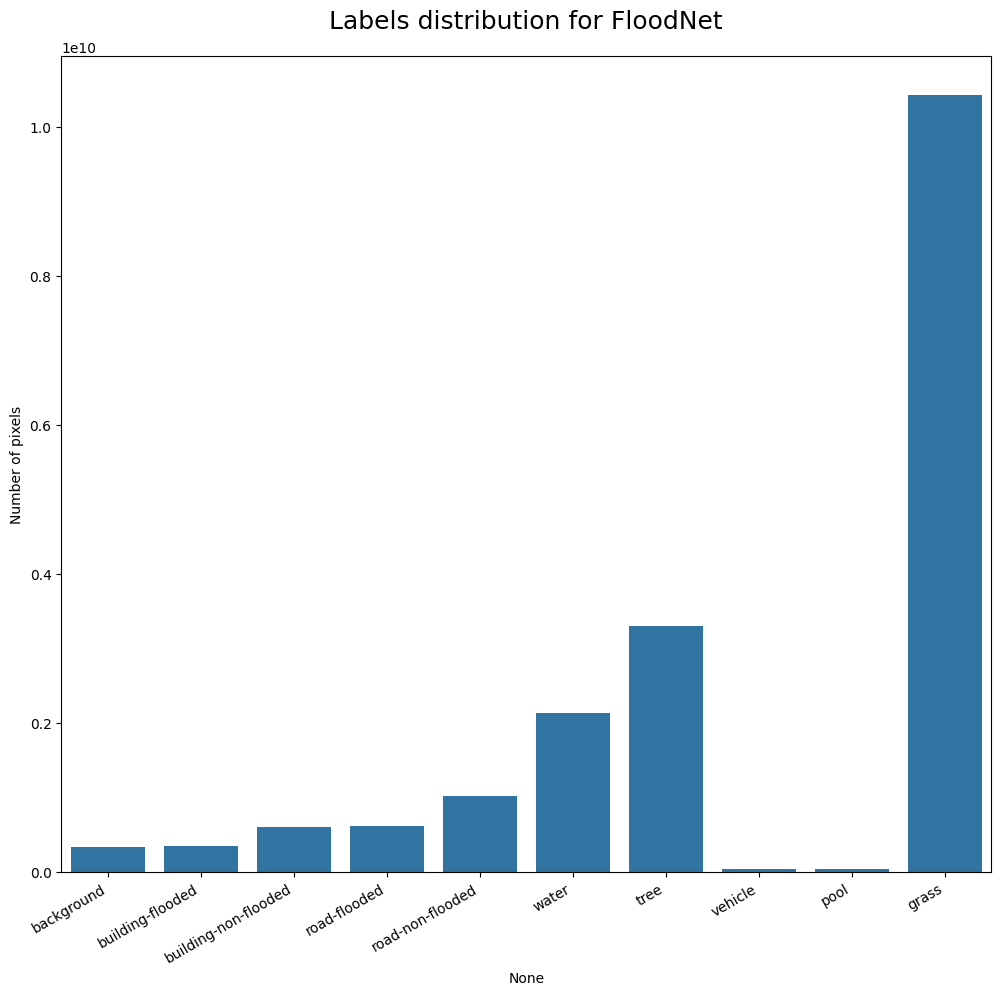

In [4]:
dataset.data_distribution_barchart();

## Load training data ##

In [6]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/FloodNet/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = FloodNetDataset(train_dataset_config)
len(train_dataset)

17991

## Create the model ##

In [7]:
epochs = 5
model_directory = "/home/dragik/data/semseg/FloodNet/experiments"
model_config = {
    "num_classes": 10, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|███                                                                    | 98/2249 [00:18<06:04,  5.90it/s]

[1, 100], loss:  0.75025


training:   9%|██████▏                                                               | 198/2249 [00:37<05:41,  6.01it/s]

[1, 200], loss:  0.64098


training:  13%|█████████▎                                                            | 298/2249 [00:55<05:13,  6.21it/s]

[1, 300], loss:  0.53099


training:  18%|████████████▍                                                         | 398/2249 [01:14<05:11,  5.94it/s]

[1, 400], loss:  0.41249


training:  22%|███████████████▌                                                      | 498/2249 [01:33<04:54,  5.95it/s]

[1, 500], loss:  0.34718


training:  27%|██████████████████▌                                                   | 598/2249 [01:51<04:33,  6.05it/s]

[1, 600], loss:  0.29197


training:  31%|█████████████████████▋                                                | 698/2249 [02:09<04:08,  6.23it/s]

[1, 700], loss:  0.28214


training:  36%|████████████████████████▊                                             | 799/2249 [02:28<04:44,  5.10it/s]

[1, 800], loss:  0.25306


training:  40%|███████████████████████████▉                                          | 899/2249 [02:46<04:24,  5.10it/s]

[1, 900], loss:  0.23227


training:  44%|███████████████████████████████                                       | 999/2249 [03:05<04:21,  4.79it/s]

[1, 1000], loss:  0.21955


training:  49%|█████████████████████████████████▋                                   | 1099/2249 [03:24<04:06,  4.66it/s]

[1, 1100], loss:  0.22188


training:  53%|████████████████████████████████████▊                                | 1199/2249 [03:42<03:30,  4.98it/s]

[1, 1200], loss:  0.20792


training:  58%|███████████████████████████████████████▊                             | 1299/2249 [04:00<02:44,  5.76it/s]

[1, 1300], loss:  0.22278


training:  62%|██████████████████████████████████████████▉                          | 1399/2249 [04:18<02:29,  5.69it/s]

[1, 1400], loss:  0.21169


training:  67%|█████████████████████████████████████████████▉                       | 1499/2249 [04:36<02:19,  5.36it/s]

[1, 1500], loss:  0.21112


training:  71%|█████████████████████████████████████████████████                    | 1599/2249 [04:54<02:21,  4.58it/s]

[1, 1600], loss:  0.19720


training:  76%|████████████████████████████████████████████████████▏                | 1699/2249 [05:12<01:45,  5.24it/s]

[1, 1700], loss:  0.18720


training:  80%|███████████████████████████████████████████████████████▏             | 1798/2249 [05:30<01:41,  4.42it/s]

[1, 1800], loss:  0.19564


training:  84%|██████████████████████████████████████████████████████████▏          | 1898/2249 [05:49<01:10,  4.97it/s]

[1, 1900], loss:  0.18119


training:  89%|█████████████████████████████████████████████████████████████▎       | 1998/2249 [06:07<00:52,  4.79it/s]

[1, 2000], loss:  0.17444


training:  93%|████████████████████████████████████████████████████████████████▎    | 2098/2249 [06:25<00:29,  5.05it/s]

[1, 2100], loss:  0.17235


training:  98%|███████████████████████████████████████████████████████████████████▍ | 2198/2249 [06:44<00:10,  4.90it/s]

[1, 2200], loss:  0.19411


training: 100%|█████████████████████████████████████████████████████████████████████| 2249/2249 [06:53<00:00,  5.44it/s]

epoch: 1, time: 414, loss:  0.28603



testing on train set: 100%|█████████████████████████████████████████████████████████| 2249/2249 [06:50<00:00,  5.48it/s]

IOU:0.7441278332241366, IOU mean:0.36740501098859746, IOU per Class:[0.         0.         0.70422631 0.         0.71615082 0.63673591
 0.76365648 0.         0.         0.8532806 ]



training:   4%|███▏                                                                   | 99/2249 [00:19<06:07,  5.84it/s]

[2, 100], loss:  0.17923


training:   9%|██████▏                                                               | 199/2249 [00:38<05:35,  6.11it/s]

[2, 200], loss:  0.17353


training:  13%|█████████▎                                                            | 299/2249 [00:57<05:32,  5.86it/s]

[2, 300], loss:  0.15772


training:  18%|████████████▍                                                         | 399/2249 [01:15<05:06,  6.03it/s]

[2, 400], loss:  0.17460


training:  22%|███████████████▌                                                      | 498/2249 [01:33<05:30,  5.30it/s]

[2, 500], loss:  0.16387


training:  27%|██████████████████▋                                                   | 599/2249 [01:51<04:22,  6.30it/s]

[2, 600], loss:  0.16437


training:  31%|█████████████████████▊                                                | 699/2249 [02:09<04:36,  5.60it/s]

[2, 700], loss:  0.15465


training:  36%|████████████████████████▊                                             | 799/2249 [02:28<03:59,  6.05it/s]

[2, 800], loss:  0.17481


training:  40%|███████████████████████████▉                                          | 899/2249 [02:46<03:44,  6.02it/s]

[2, 900], loss:  0.17736


training:  44%|███████████████████████████████                                       | 999/2249 [03:05<03:28,  5.98it/s]

[2, 1000], loss:  0.15972


training:  49%|█████████████████████████████████▋                                   | 1099/2249 [03:23<03:10,  6.03it/s]

[2, 1100], loss:  0.16918


training:  53%|████████████████████████████████████▊                                | 1199/2249 [03:42<02:53,  6.04it/s]

[2, 1200], loss:  0.17092


training:  58%|███████████████████████████████████████▊                             | 1299/2249 [04:00<02:34,  6.15it/s]

[2, 1300], loss:  0.14925


training:  62%|██████████████████████████████████████████▉                          | 1399/2249 [04:18<02:16,  6.22it/s]

[2, 1400], loss:  0.16098


training:  67%|█████████████████████████████████████████████▉                       | 1499/2249 [04:36<01:59,  6.27it/s]

[2, 1500], loss:  0.18748


training:  71%|█████████████████████████████████████████████████                    | 1599/2249 [04:53<01:46,  6.10it/s]

[2, 1600], loss:  0.16814


training:  76%|████████████████████████████████████████████████████▏                | 1699/2249 [05:10<01:25,  6.47it/s]

[2, 1700], loss:  0.17219


training:  80%|███████████████████████████████████████████████████████▏             | 1798/2249 [05:30<01:22,  5.44it/s]

[2, 1800], loss:  0.16151


training:  84%|██████████████████████████████████████████████████████████▏          | 1898/2249 [05:48<00:56,  6.21it/s]

[2, 1900], loss:  0.15943


training:  89%|█████████████████████████████████████████████████████████████▎       | 1999/2249 [06:06<00:41,  6.02it/s]

[2, 2000], loss:  0.16064


training:  93%|████████████████████████████████████████████████████████████████▍    | 2099/2249 [06:24<00:24,  6.09it/s]

[2, 2100], loss:  0.16576


training:  98%|███████████████████████████████████████████████████████████████████▍ | 2199/2249 [06:42<00:08,  6.03it/s]

[2, 2200], loss:  0.14860


training: 100%|█████████████████████████████████████████████████████████████████████| 2249/2249 [06:52<00:00,  5.46it/s]

epoch: 2, time: 412, loss:  0.16610



testing on train set: 100%|█████████████████████████████████████████████████████████| 2249/2249 [06:46<00:00,  5.53it/s]

IOU:0.7569831183444085, IOU mean:0.3797083695073267, IOU per Class:[0.         0.         0.73564236 0.         0.7712051  0.65378521
 0.77450399 0.         0.         0.86194703]



training:   4%|███                                                                    | 98/2249 [00:20<06:58,  5.15it/s]

[3, 100], loss:  0.14440


training:   9%|██████▏                                                               | 199/2249 [00:39<05:54,  5.79it/s]

[3, 200], loss:  0.16561


training:  13%|█████████▎                                                            | 299/2249 [00:58<05:32,  5.86it/s]

[3, 300], loss:  0.16019


training:  18%|████████████▍                                                         | 399/2249 [01:17<05:24,  5.70it/s]

[3, 400], loss:  0.14577


training:  22%|███████████████▌                                                      | 498/2249 [01:36<05:10,  5.64it/s]

[3, 500], loss:  0.14260


training:  27%|██████████████████▋                                                   | 599/2249 [01:53<04:20,  6.34it/s]

[3, 600], loss:  0.14074


training:  31%|█████████████████████▊                                                | 699/2249 [02:10<04:03,  6.37it/s]

[3, 700], loss:  0.15687


training:  36%|████████████████████████▊                                             | 799/2249 [02:27<03:46,  6.40it/s]

[3, 800], loss:  0.15890


training:  40%|███████████████████████████▉                                          | 899/2249 [02:45<04:12,  5.36it/s]

[3, 900], loss:  0.14965


training:  44%|███████████████████████████████                                       | 999/2249 [03:02<03:58,  5.24it/s]

[3, 1000], loss:  0.17508


training:  49%|█████████████████████████████████▋                                   | 1099/2249 [03:20<03:43,  5.14it/s]

[3, 1100], loss:  0.15174


training:  53%|████████████████████████████████████▊                                | 1199/2249 [03:37<03:22,  5.19it/s]

[3, 1200], loss:  0.14612


training:  58%|███████████████████████████████████████▊                             | 1299/2249 [03:55<03:00,  5.26it/s]

[3, 1300], loss:  0.14893


training:  62%|██████████████████████████████████████████▉                          | 1399/2249 [04:12<02:42,  5.23it/s]

[3, 1400], loss:  0.15397


training:  67%|█████████████████████████████████████████████▉                       | 1499/2249 [04:30<02:22,  5.27it/s]

[3, 1500], loss:  0.14303


training:  71%|█████████████████████████████████████████████████                    | 1599/2249 [04:47<02:03,  5.27it/s]

[3, 1600], loss:  0.14285


training:  76%|████████████████████████████████████████████████████▏                | 1699/2249 [05:04<01:43,  5.29it/s]

[3, 1700], loss:  0.15015


training:  80%|███████████████████████████████████████████████████████▏             | 1799/2249 [05:22<01:24,  5.32it/s]

[3, 1800], loss:  0.15308


training:  84%|██████████████████████████████████████████████████████████▎          | 1899/2249 [05:39<01:06,  5.26it/s]

[3, 1900], loss:  0.15432


training:  89%|█████████████████████████████████████████████████████████████▎       | 1999/2249 [05:57<00:47,  5.23it/s]

[3, 2000], loss:  0.16623


training:  93%|████████████████████████████████████████████████████████████████▍    | 2099/2249 [06:14<00:28,  5.23it/s]

[3, 2100], loss:  0.15702


training:  98%|███████████████████████████████████████████████████████████████████▍ | 2199/2249 [06:32<00:09,  5.22it/s]

[3, 2200], loss:  0.15737


training: 100%|█████████████████████████████████████████████████████████████████████| 2249/2249 [06:41<00:00,  5.61it/s]

epoch: 3, time: 401, loss:  0.15244



testing on train set: 100%|█████████████████████████████████████████████████████████| 2249/2249 [06:23<00:00,  5.86it/s]

IOU:0.7583030188773104, IOU mean:0.3826814548188296, IOU per Class:[0.         0.         0.76315538 0.         0.77980015 0.64269762
 0.77641378 0.         0.         0.86474763]



training:   4%|███▏                                                                   | 99/2249 [00:18<05:41,  6.30it/s]

[4, 100], loss:  0.16132


training:   9%|██████▏                                                               | 199/2249 [00:35<05:23,  6.33it/s]

[4, 200], loss:  0.15943


training:  13%|█████████▎                                                            | 299/2249 [00:53<05:05,  6.38it/s]

[4, 300], loss:  0.15115


training:  18%|████████████▍                                                         | 399/2249 [01:10<04:47,  6.42it/s]

[4, 400], loss:  0.15840


training:  22%|███████████████▌                                                      | 499/2249 [01:27<04:40,  6.24it/s]

[4, 500], loss:  0.15327


training:  27%|██████████████████▋                                                   | 599/2249 [01:44<04:33,  6.04it/s]

[4, 600], loss:  0.14679


training:  31%|█████████████████████▊                                                | 699/2249 [02:02<04:26,  5.82it/s]

[4, 700], loss:  0.15633


training:  36%|████████████████████████▊                                             | 799/2249 [02:19<03:48,  6.34it/s]

[4, 800], loss:  0.15611


training:  40%|███████████████████████████▉                                          | 899/2249 [02:36<03:34,  6.31it/s]

[4, 900], loss:  0.15607


training:  44%|███████████████████████████████                                       | 999/2249 [02:53<03:15,  6.38it/s]

[4, 1000], loss:  0.14880


training:  49%|█████████████████████████████████▋                                   | 1099/2249 [03:11<03:00,  6.39it/s]

[4, 1100], loss:  0.12819


training:  53%|████████████████████████████████████▊                                | 1199/2249 [03:28<02:44,  6.39it/s]

[4, 1200], loss:  0.14086


training:  58%|███████████████████████████████████████▊                             | 1299/2249 [03:45<02:28,  6.40it/s]

[4, 1300], loss:  0.15153


training:  62%|██████████████████████████████████████████▉                          | 1399/2249 [04:02<02:11,  6.46it/s]

[4, 1400], loss:  0.15011


training:  67%|█████████████████████████████████████████████▉                       | 1499/2249 [04:19<01:56,  6.44it/s]

[4, 1500], loss:  0.15593


training:  71%|█████████████████████████████████████████████████                    | 1599/2249 [04:36<01:41,  6.39it/s]

[4, 1600], loss:  0.13526


training:  76%|████████████████████████████████████████████████████▏                | 1699/2249 [04:53<01:25,  6.42it/s]

[4, 1700], loss:  0.14540


training:  80%|███████████████████████████████████████████████████████▏             | 1799/2249 [05:10<01:10,  6.39it/s]

[4, 1800], loss:  0.15130


training:  84%|██████████████████████████████████████████████████████████▎          | 1899/2249 [05:28<00:54,  6.39it/s]

[4, 1900], loss:  0.15643


training:  89%|█████████████████████████████████████████████████████████████▎       | 1999/2249 [05:45<00:39,  6.40it/s]

[4, 2000], loss:  0.13050


training:  93%|████████████████████████████████████████████████████████████████▍    | 2099/2249 [06:02<00:23,  6.39it/s]

[4, 2100], loss:  0.14851


training:  98%|███████████████████████████████████████████████████████████████████▍ | 2199/2249 [06:19<00:07,  6.42it/s]

[4, 2200], loss:  0.13003


training: 100%|█████████████████████████████████████████████████████████████████████| 2249/2249 [06:27<00:00,  5.80it/s]

epoch: 4, time: 388, loss:  0.14841



testing on train set: 100%|█████████████████████████████████████████████████████████| 2249/2249 [06:27<00:00,  5.80it/s]

IOU:0.7610125408600268, IOU mean:0.3866891096419416, IOU per Class:[0.         0.         0.76422156 0.         0.80312366 0.65776965
 0.77601011 0.         0.         0.86576612]



training:   4%|███                                                                    | 98/2249 [00:18<06:40,  5.37it/s]

[5, 100], loss:  0.14334


training:   9%|██████▏                                                               | 198/2249 [00:35<06:35,  5.18it/s]

[5, 200], loss:  0.13478


training:  13%|█████████▎                                                            | 298/2249 [00:53<06:28,  5.02it/s]

[5, 300], loss:  0.13263


training:  18%|████████████▍                                                         | 398/2249 [01:10<06:21,  4.85it/s]

[5, 400], loss:  0.13450


training:  22%|███████████████▌                                                      | 499/2249 [01:27<05:22,  5.42it/s]

[5, 500], loss:  0.15456


training:  27%|██████████████████▋                                                   | 599/2249 [01:45<05:09,  5.34it/s]

[5, 600], loss:  0.14263


training:  31%|█████████████████████▊                                                | 699/2249 [02:02<05:12,  4.96it/s]

[5, 700], loss:  0.13642


training:  36%|████████████████████████▊                                             | 799/2249 [02:19<04:59,  4.83it/s]

[5, 800], loss:  0.13823


training:  40%|███████████████████████████▉                                          | 899/2249 [02:36<04:12,  5.36it/s]

[5, 900], loss:  0.14342


training:  44%|███████████████████████████████                                       | 999/2249 [02:54<03:52,  5.38it/s]

[5, 1000], loss:  0.14909


training:  49%|█████████████████████████████████▋                                   | 1099/2249 [03:11<03:34,  5.36it/s]

[5, 1100], loss:  0.15160


training:  53%|████████████████████████████████████▊                                | 1199/2249 [03:28<03:16,  5.35it/s]

[5, 1200], loss:  0.15089


training:  58%|███████████████████████████████████████▊                             | 1299/2249 [03:45<02:57,  5.36it/s]

[5, 1300], loss:  0.14249


training:  62%|██████████████████████████████████████████▉                          | 1399/2249 [04:02<02:38,  5.35it/s]

[5, 1400], loss:  0.14847


training:  67%|█████████████████████████████████████████████▉                       | 1499/2249 [04:20<02:19,  5.36it/s]

[5, 1500], loss:  0.15031


training:  71%|█████████████████████████████████████████████████                    | 1599/2249 [04:37<02:02,  5.31it/s]

[5, 1600], loss:  0.14986


training:  76%|████████████████████████████████████████████████████▏                | 1699/2249 [04:54<01:43,  5.31it/s]

[5, 1700], loss:  0.13381


training:  80%|███████████████████████████████████████████████████████▏             | 1799/2249 [05:11<01:24,  5.33it/s]

[5, 1800], loss:  0.13083


training:  84%|██████████████████████████████████████████████████████████▎          | 1899/2249 [05:29<01:05,  5.32it/s]

[5, 1900], loss:  0.15120


training:  89%|█████████████████████████████████████████████████████████████▎       | 1999/2249 [05:46<00:47,  5.30it/s]

[5, 2000], loss:  0.14739


training:  93%|████████████████████████████████████████████████████████████████▍    | 2099/2249 [06:03<00:28,  5.28it/s]

[5, 2100], loss:  0.13214


training:  98%|███████████████████████████████████████████████████████████████████▍ | 2199/2249 [06:21<00:09,  5.25it/s]

[5, 2200], loss:  0.16343


training: 100%|█████████████████████████████████████████████████████████████████████| 2249/2249 [06:30<00:00,  5.77it/s]

epoch: 5, time: 390, loss:  0.14376



testing on train set: 100%|█████████████████████████████████████████████████████████| 2249/2249 [06:27<00:00,  5.80it/s]

IOU:0.7585232627443114, IOU mean:0.3849819537110804, IOU per Class:[0.         0.         0.74186632 0.         0.81277303 0.65745922
 0.77585652 0.         0.         0.86186444]


Train loss: [0.15462235904880936, 0.14193916499704168, 0.1399650467249824, 0.13860967805178726, 0.13994981382390245]
Validation loss: []
Train time per epochs: [414, 412, 401, 388, 390]
Finished training. training time: 2005


## Evaluate the model ##

In [9]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/FloodNet/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}

test_dataset = FloodNetDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Loading checkpoint /home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar at epoch 6


testing on test set: 100%|██████████████████████████████████████████████████████████| 1403/1403 [02:04<00:00, 11.26it/s]


[{'IOU': 0.7417900731038156,
  'IOU mean': 0.37797093131222426,
  'IOU per Class': array([0.        , 0.        , 0.72879001, 0.        , 0.79112091,
         0.63229467, 0.78001286, 0.        , 0.        , 0.84749087])}]

## Predictions ##

Loading checkpoint /home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar at epoch 6


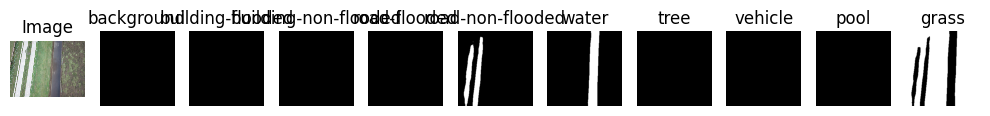

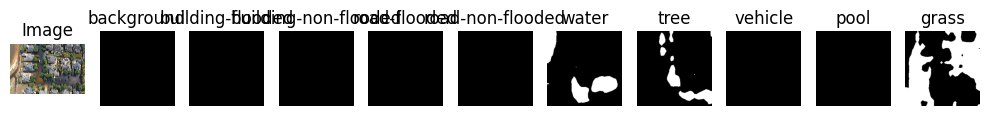

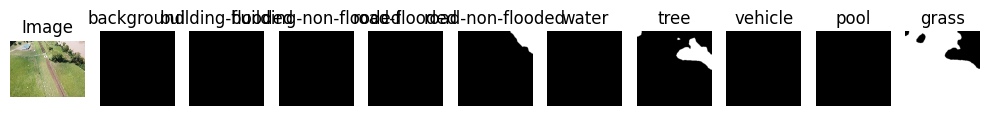

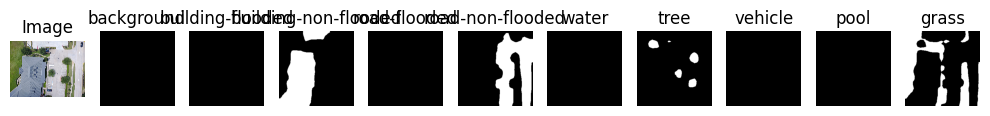

In [13]:
model_path = "/home/dragik/data/semseg/FloodNet/experiments/checkpoint.pth.tar"
labels = ["background","building-flooded","building-non-flooded","road-flooded","road-non-flooded","water","tree","vehicle","pool","grass"]
transform = ResizeToTensor()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/FloodNet/test/images/6353.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/FloodNet/test/images/6700.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/FloodNet/test/images/7105.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/FloodNet/test/images/7647.png')
fig = model.predict_masks(image, labels, transform)